# **PROJETO CASE AIRBNB**

Escola: SoulAcademy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 06

Aluno: Angelo Máximo

Fontes de Pesquisas: Google, Medium, Collab Mentoria e Collab Código Final, ChatGPT e Livro: Data Science para Leigos - Lillian Pierson



## **Requisitos**

***Pergunta de negócio***:

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

***Nível - Tratamento e Análise***:

Verificar todos os passos da estratégia geral de análise de dados;

Executar o que for necessário;

Todos os passos devem ser comentados;

Realizar no mínimo 3 análises apenas numéricas;

Realizar plotagens para no mínimo 3 análises;

Chegar a uma conclusão de sua análise;

***Nivel Infra***:

O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado).

***O que será analisado:***

Pontualidade;

Organização de código;

Atendimento aos requisitos;

Capacidade de Pesquisa e Autonomia;

Aplicação da Estratégia Geral de Análise de Dados;

***Observação***:

Em caso de algum(ns) itens não forem contemplados, realize a entrega do que foi concluído com justificativa. Em momento oportuno, solicitaremos acesso aos ambientes em nuvem do projeto.

*Link de apoio:*
https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://zenodo.org/record/4446043#.Y9Y9ENJBwUE


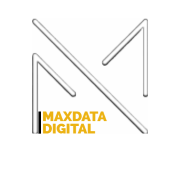

# Análise dos Dados do Airbnb - Cidades Europeias

O [Airbnb](https://www.airbnb.com.br/) já é amplamente reconhecido como a **maior empresa hoteleira da atualidade**. Ah, a peculiaridade reside no fato que ela **não possui qualquer hotel**!

Unindo invivíduos interessados em viajar (e encontrar hospedagem) com anfitriões dispostos a alugar suas propriedades de forma conveniente, o Airbnb oferece uma plataforma inoavadora para acomodações alternativas.

No final de 2018, a Startup estabalecida há uma década, já havia **hospedado mais de 300 milhões** de pessoas em todos os cantos do globo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é compartilhar dados referente ao seu site, para algumas das principais cidades do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível acesar uma vasta quantidade de dados para desenvolver projetos e soluções de *Análise de Dados e Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Instalação de Pacotes


In [ ]:
# instalaçoes dos pacotes necessarios
# Executar uma vez
!pip install gcsfs
!pip install pandera

## Abertura de Bibilotecas

In [2]:
# Abertura de bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import storage

In [3]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

## Extração



*   Google Cloud
*   Google Drive






In [8]:
# Configuração da chave de acesso de segurança - acesso ao projeto
serviceAccount = "/content/analisemax01-9051ec7f5603.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [12]:
# Configurações Google Cloud Storage - acesso ao Bucket
client = storage.Client()
bucket = client.get_bucket('maxdata_digital01')
bucket.blob('airbnb.cvs')
path = 'gs://maxdata_digital01/Bruto/airbnb.csv'

In [13]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

In [ ]:
# Comando de abertura para Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Extração por Google Drive
#df = pd.read_csv('',
#                 sep=';',
#                 encoding='ISO-8859-1',
#                 dayfirst = True)

## Dicionário dos Dados


**Dicionário das variáveis**

* ***realSum***: o preço total do alojamento para duas pessoas e duas noites em EUR
* ***room_type***: (tipo de quarto oferecido, como privado/compartilhado/casa inteira/apt)
* ***room_shared***:(se o quarto é compartilhado ou não)
* ***room_private***: Se o querto é privado ou não
* ***person_capacity***: (número máximo de pessoas permitidas na propriedade)
* ***host_is_superhost***: (se o host é ou não um superhost) (valor booleano, verdadeiro ou falso)
* ***multi***: (seja para várias salas ou não)
* ***biz***: (seja para uso comercial ou familiar)
* ***clean_rating***: classificação de limpeza
* ***guest_satisfaction_overall***: avaliação geral do anúncio
* ***bedrooms***: número de quartos (0 para estúdios)
* ***dist***: distância do centro da cidade em km
* ***metro_dist***: distância da estação de metrô mais próxima em km
* ***attr_index***: índice de atração do local do anúncio
* ***attr_index_norm***: índice de atração normalizado (0-100)
* ***rest_index***: índice do restaurante do local da listagem
* ***attr_index_norm***: índice de restaurante normalizado (0-100)
* ***lng***: longitude do local de listagem
* ***lat***: latitude do local da listagem
































Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [14]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


## Verificação - Pré-análise dos Dados

In [15]:
# Visualização do dataframe começando pelo final
df.tail()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794
1102,1102,258.008577,Shared room,True,False,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [16]:
#Verificando se tem algum quarto que consta como compartilhado e privado ao mesmo tempo
ftcompartilhado = df.room_shared == True
ftprivado = df.room_private == True

In [17]:
#Localizando as linhas que correspondem ao filtro feito anteriormente
df.loc[ftcompartilhado & ftprivado]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [18]:
# Tamanho do dataframe
df.shape

(1103, 20)

In [19]:
# identificar o volume de dados e tipagem do Dataframe
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 1103
Variáveis:	 20



Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [20]:
# Contar a quantidade de observações
df.count()

Unnamed: 0                    1103
realSum                       1103
room_type                     1103
room_shared                   1103
room_private                  1103
person_capacity               1103
host_is_superhost             1103
multi                         1103
biz                           1103
cleanliness_rating            1103
guest_satisfaction_overall    1103
bedrooms                      1103
dist                          1103
metro_dist                    1103
attr_index                    1103
attr_index_norm               1103
rest_index                    1103
rest_index_norm               1103
lng                           1103
lat                           1103
dtype: int64

In [21]:
# Informações detalhadas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

Diante da quantidade de dados que temos: 1103 linhas e 15 colunas. Observe que não contêm dados nulos.
df.info()

## Backup

In [22]:
# Backup local do df
dfback1 = df.copy()

## Transformação/ Normalização

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

Escolher as possíveis colunas importantes para a análise;

Verificar se há colunas iguais;

Verificação e tratamento de valores (ou observações) únicos;

Verificação e tratamento de valores nulos

Tradução/Renomeação



##Colunas a serem trabalhadas



*   tipo de quarto,
*   se é compartilhado,
*   capacidade,
*   nota da limpeza,
*   distancia centro,
*   distancia metro,
*   tipo de host,
*   satisfação,
*   soma real
*   latitude,
*   longitude.








In [23]:
# Renomeando colunas usando inplace = True para forçar a mudança
df.rename(columns={'realSum':'soma_real',
                   'room_type':'tipo_quarto',
                   'room_shared':'quarto_compartilhado',
                   'room_private': 'quarto_privado',
                   'person_capacity': 'capacidade_pessoas',
                   'host_is_superhost':'ident_superhost',
                   'cleanliness_rating':'class_limpeza',
                   'guest_satisfaction_overall':'grau_satisfacao',
                   'bedrooms': 'quartos'},inplace=True)

In [24]:
# Visualização do dataset df de forma aleatória:
df.sample(5)

,Unnamed: 0,soma_real,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,ident_superhost,multi,biz,class_limpeza,grau_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
986,986,841.984393,Entire home/apt,False,False,4.0,True,0,0,10.0,98.0,3,1.331918,1.210672,362.376848,19.188095,478.422482,33.337167,4.87615,52.36726
77,77,399.550067,Entire home/apt,False,False,2.0,True,0,0,10.0,97.0,1,9.335519,0.380486,49.325673,2.611827,61.589477,4.291643,4.98057,52.30865
947,947,934.080097,Entire home/apt,False,False,4.0,False,0,0,9.0,94.0,2,0.471918,0.315271,483.158157,25.583545,781.622980,54.464614,4.89580,52.37714
194,194,317.062311,Private room,False,True,2.0,False,1,0,10.0,95.0,1,0.593229,0.636591,418.754283,22.173318,603.264363,42.036329,4.89065,52.37835
714,714,199.892204,Private room,False,True,2.0,True,1,0,9.0,95.0,1,2.321881,1.797271,161.956594,8.575709,207.439535,14.454685,4.87617,52.39135


In [25]:
#Excluindo colunas que não trabalharemos

df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [26]:
# Modo 1: Verificando se as colunas são iguais
if (df['lng'] == df['lat']).all():
    print("As colunas são iguais.")
else:
    print("As colunas são diferentes.")

As colunas são diferentes.


In [27]:
# Modo 2: Verificando se as colunas são iguais
# Nome das colunas a serem verificadas
colunas_verificar = ['attr_index_norm', 'rest_index', 'rest_index_norm']

# Verificando se as colunas são iguais à coluna 'attr_index'
for coluna in colunas_verificar:
    if (df['attr_index']== df[coluna]).all():
        print(f"A coluna {coluna} é igual à coluna 'attr_index'.")
    else:
        print(f"A coluna {coluna} é diferente da coluna 'attr_index'.")

A coluna attr_index_norm é diferente da coluna 'attr_index'.
A coluna rest_index é diferente da coluna 'attr_index'.
A coluna rest_index_norm é diferente da coluna 'attr_index'.


In [28]:
# Verifica se dados são unicos na coluna
df.attr_index.is_unique

True

In [29]:
# Verificar dados Nulos , ausentes , etc - isnull()
df.isna().sum()

soma_real               0
tipo_quarto             0
quarto_compartilhado    0
quarto_privado          0
capacidade_pessoas      0
ident_superhost         0
multi                   0
biz                     0
class_limpeza           0
grau_satisfacao         0
quartos                 0
dist                    0
metro_dist              0
attr_index              0
attr_index_norm         0
rest_index              0
rest_index_norm         0
lng                     0
lat                     0
dtype: int64

In [30]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

soma_real               0.0
tipo_quarto             0.0
quarto_compartilhado    0.0
quarto_privado          0.0
capacidade_pessoas      0.0
ident_superhost         0.0
multi                   0.0
biz                     0.0
class_limpeza           0.0
grau_satisfacao         0.0
quartos                 0.0
dist                    0.0
metro_dist              0.0
attr_index              0.0
attr_index_norm         0.0
rest_index              0.0
rest_index_norm         0.0
lng                     0.0
lat                     0.0
dtype: float64


In [31]:
# Verificação de valores unicos na coluna
print(pd.unique(df['grau_satisfacao']))

[ 93.  85.  87.  90.  98. 100.  94.  96.  88.  97.  95.  89.  91.  84.
  77.  99.  80.  92.  82.  78.  86.  74.  81.  83.  73.  76.  75.  70.
  65.  47.  60.  20.]


In [32]:
df.head()

,soma_real,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,ident_superhost,multi,biz,class_limpeza,grau_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


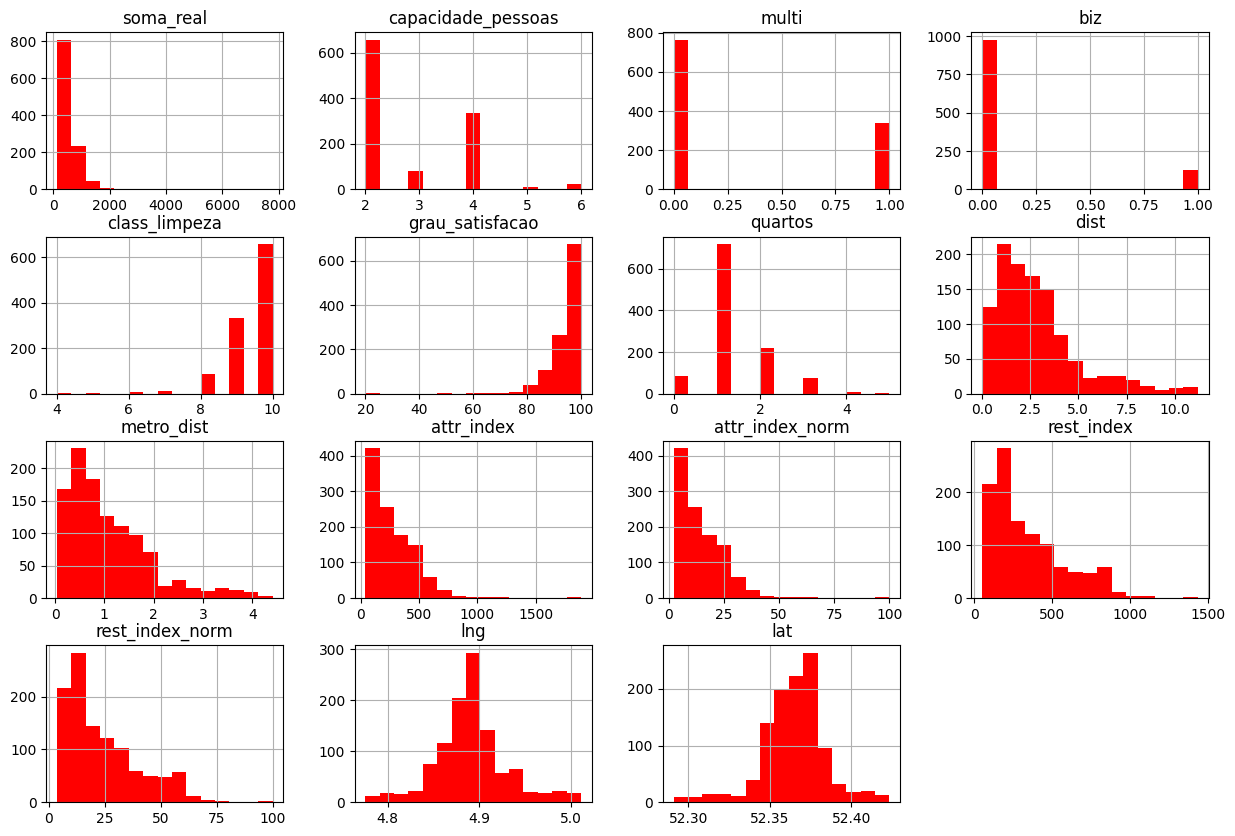

In [33]:
# plotar o histograma das variáveis numéricas
# Agora iremos plotar alguns histogramas para visualizar a distribuição de cada variável e começar a procurar por valores atípicos.
df.hist(bins=15, figsize=(15,10), color = 'r');

In [34]:
# Checando dados Nulos , ausentes , etc
df.isnull().sum()

soma_real               0
tipo_quarto             0
quarto_compartilhado    0
quarto_privado          0
capacidade_pessoas      0
ident_superhost         0
multi                   0
biz                     0
class_limpeza           0
grau_satisfacao         0
quartos                 0
dist                    0
metro_dist              0
attr_index              0
attr_index_norm         0
rest_index              0
rest_index_norm         0
lng                     0
lat                     0
dtype: int64

Qual a porcentagem de valores ausentes no *dataset*?

In [35]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

soma_real               0.0
quartos                 0.0
lng                     0.0
rest_index_norm         0.0
rest_index              0.0
attr_index_norm         0.0
attr_index              0.0
metro_dist              0.0
dist                    0.0
grau_satisfacao         0.0
tipo_quarto             0.0
class_limpeza           0.0
biz                     0.0
multi                   0.0
ident_superhost         0.0
capacidade_pessoas      0.0
quarto_privado          0.0
quarto_compartilhado    0.0
lat                     0.0
dtype: float64

## Carregamento

In [36]:
# Google Cloud
df.to_csv('gs://maxdata_digital01/Tratado/airbnb_tratado.csv', index=False) # salva no bucket

## Análises e Visulaizações

In [37]:
df.head(5)

,soma_real,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,ident_superhost,multi,biz,class_limpeza,grau_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


Qual o tipo de distribuição das variáveis?

In [38]:
df.describe()

,soma_real,capacidade_pessoas,multi,biz,class_limpeza,grau_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


Qual a média dos preços de aluguel?

In [39]:
# ver a média da coluna `soma_real`
media_somareal = df['soma_real'].mean()

print(media_somareal)

545.0205264394507


valores totais acima do terceiro quartil
277


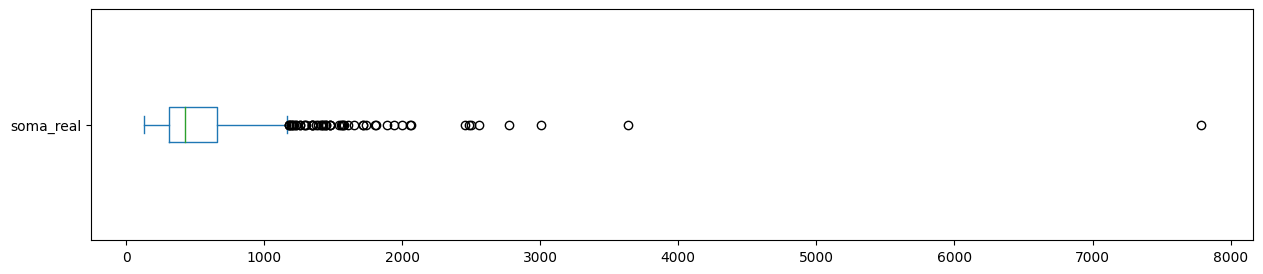

In [40]:
df.soma_real.plot(kind='box', vert=False, figsize=(15,3))
print("valores totais acima do terceiro quartil")
print(len(df[df.soma_real > 657.32]))

In [41]:
#Possíveis outliers dentre 277 valores representam 25%
len(df[df.soma_real > 657.32])/df.shape[0]*100


25.11332728921124

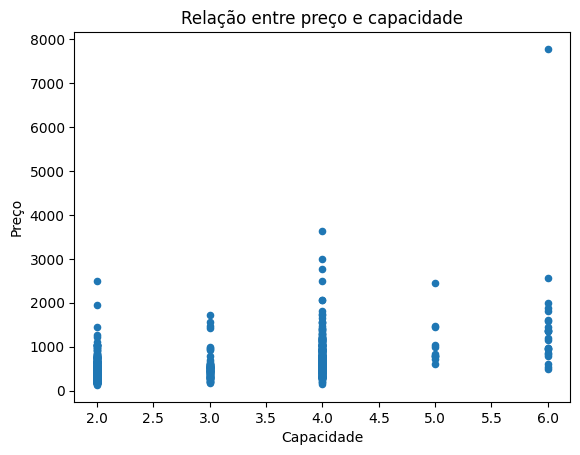

Correlação entre preço e capacidade: 0.5269918982176924


In [42]:
# Gráfico de dispersão entre preço e capacidade
df.plot.scatter(x='capacidade_pessoas', y='soma_real')
plt.xlabel('Capacidade')
plt.ylabel('Preço')
plt.title('Relação entre preço e capacidade')
plt.show()

# Calcular a correlação entre preço e capacidade
correlation_price_capacity = df['soma_real'].corr(df['capacidade_pessoas'])

# Exibir a correlação calculada
print("Correlação entre preço e capacidade:", correlation_price_capacity)

In [43]:
# Filtrar os dados para obter apenas os superhosts
superhosts = df[df['ident_superhost'] == True]

# Filtrar os dados para obter apenas os não superhosts
nao_superhosts = df[df['ident_superhost'] == False]

# Calcular as médias das classificações de satisfação dos hóspedes para superhosts e não superhosts
med_satisfacao_superhosts = superhosts['grau_satisfacao'].mean()
med_satisfacao_nao_superhosts = nao_superhosts['grau_satisfacao'].mean()

# Calcular as médias das classificações de limpeza para superhosts e não superhosts
med_classlimpeza_superhosts = superhosts['class_limpeza'].mean()
med_classlimpeza_nao_superhosts = nao_superhosts['class_limpeza'].mean()

# Exibir as médias calculadas
print("Média da satisfação dos hóspedes (Superhosts):", med_satisfacao_superhosts)
print("Média da satisfação dos hóspedes (Não Superhosts):", med_satisfacao_nao_superhosts)
print("Média da limpeza (Superhosts):", med_classlimpeza_superhosts)
print("Média da limpeza (Não Superhosts):", med_classlimpeza_nao_superhosts)

Média da satisfação dos hóspedes (Superhosts): 97.19504643962848
Média da satisfação dos hóspedes (Não Superhosts): 93.18974358974359
Média da limpeza (Superhosts): 9.85139318885449
Média da limpeza (Não Superhosts): 9.3


In [44]:
# Analisar a relação entre a distância do centro da cidade e o preço
corr_somareal_dist = df['soma_real'].corr(df['dist'])

# Analisar a relação entre a proximidade com a estação de metrô e o preço
corr_somareal_metro_dist = df['soma_real'].corr(df['metro_dist'])

# Analisar a relação entre a distância do centro da cidade e a classificação geral
corr_satisfacao_dist = df['grau_satisfacao'].corr(df['dist'])

# Analisar a relação entre a proximidade com a estação de metrô e a classificação geral
corr_satisfacao_metro_dist = df['grau_satisfacao'].corr(df['metro_dist'])

# Exibir as correlações calculadas
print("Correlação entre distância do centro da cidade e preço:", corr_somareal_dist)
print("Correlação entre proximidade com a estação de metrô e preço:", corr_somareal_metro_dist)
print("Correlação entre distância do centro da cidade e classificação geral:", corr_satisfacao_dist)
print("Correlação entre proximidade com a estação de metrô e classificação geral:", corr_satisfacao_metro_dist)

Correlação entre distância do centro da cidade e preço: -0.2586916859894173
Correlação entre proximidade com a estação de metrô e preço: -0.1422978187783626
Correlação entre distância do centro da cidade e classificação geral: -0.059804787087009044
Correlação entre proximidade com a estação de metrô e classificação geral: 0.0508099010272962


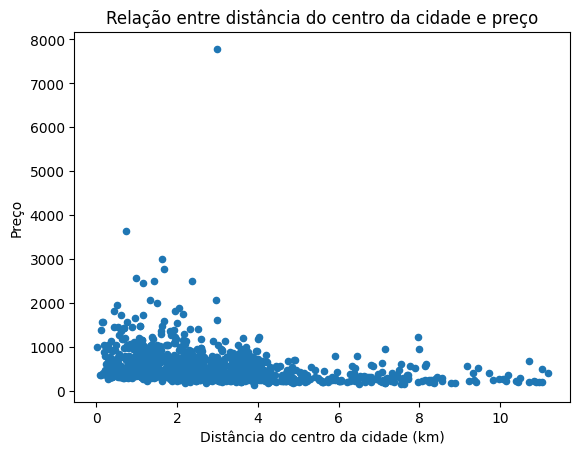

In [45]:
# Análise da relação entre a distância do centro da cidade e o preço
df.plot.scatter(x='dist', y='soma_real')
plt.xlabel('Distância do centro da cidade (km)')
plt.ylabel('Preço')
plt.title('Relação entre distância do centro da cidade e preço')
plt.show()

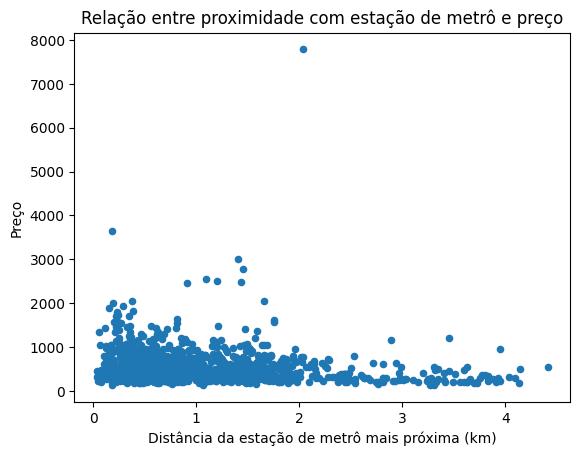

In [46]:
# Análise da relação entre a proximidade com a estação de metrô e o preço
df.plot.scatter(x='metro_dist', y='soma_real')
plt.xlabel('Distância da estação de metrô mais próxima (km)')
plt.ylabel('Preço')
plt.title('Relação entre proximidade com estação de metrô e preço')
plt.show()

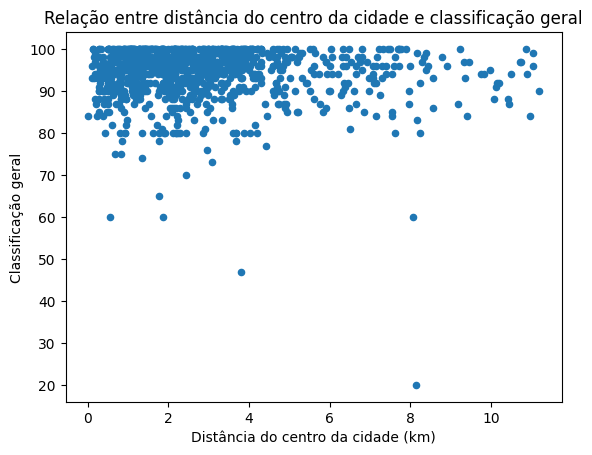

In [47]:
# Análise da relação entre a distância do centro da cidade e a classificação geral
df.plot.scatter(x='dist', y='grau_satisfacao')
plt.xlabel('Distância do centro da cidade (km)')
plt.ylabel('Classificação geral')
plt.title('Relação entre distância do centro da cidade e classificação geral')
plt.show()

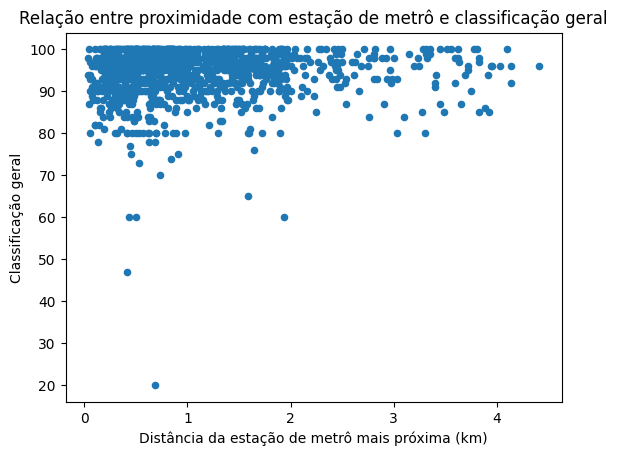

In [48]:
# Análise da relação entre a proximidade com a estação de metrô e a classificação geral
df.plot.scatter(x='metro_dist', y='grau_satisfacao')
plt.xlabel('Distância da estação de metrô mais próxima (km)')
plt.ylabel('Classificação geral')
plt.title('Relação entre proximidade com estação de metrô e classificação geral')
plt.show()

In [49]:
# Substituição de valor: tradução das categorias dentro das colunas

df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'casa inteira/apto'
df.loc[df.tipo_quarto == 'Private room',    ['tipo_quarto']] = 'quarto privado'
df.loc[df.tipo_quarto == 'Shared room',     ['tipo_quarto']] = 'quarto compartilhado'

# Imprima dataframe com as alterações
df.head()

,soma_real,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade_pessoas,ident_superhost,multi,biz,class_limpeza,grau_satisfacao,quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,quarto privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,quarto privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,quarto privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,quarto privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,quarto privado,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [50]:
sorted(pd.unique(df['tipo_quarto']))


['casa inteira/apto', 'quarto compartilhado', 'quarto privado']

In [51]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.tipo_quarto.value_counts()

quarto privado          559
casa inteira/apto       538
quarto compartilhado      6
Name: tipo_quarto, dtype: int64

In [52]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df['tipo_quarto'].value_counts() / len(df) * 100

quarto privado          50.679964
casa inteira/apto       48.776065
quarto compartilhado     0.543971
Name: tipo_quarto, dtype: float64

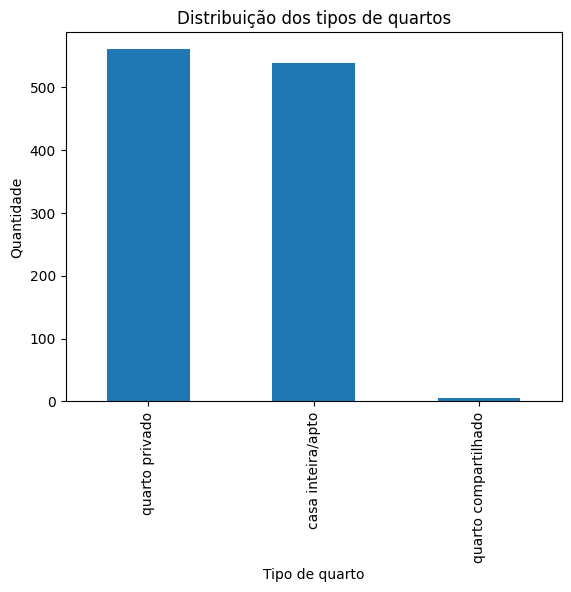

In [53]:
# Gráfico de barras da distribuição dos tipos de quartos
tipoquartos_counts = df['tipo_quarto'].value_counts()
tipoquartos_counts.plot(kind='bar')
plt.xlabel('Tipo de quarto')
plt.ylabel('Quantidade')
plt.title('Distribuição dos tipos de quartos')
plt.show()

Com isso concluimos que o tipo de quarto mais alugado é o quarto privado

Se ainda juntarmos com o casa inteiro/apto, temos praticamente 99% dos nossos dados.

In [54]:
# ver a média da coluna `grau_satisfacao`
media_gsatisfacao = df['grau_satisfacao'].mean()

print(media_gsatisfacao)

94.36264732547598


In [55]:
df.groupby(["tipo_quarto"]).grau_satisfacao.sum().sort_values(ascending=False)

tipo_quarto
quarto privado          52301.0
casa inteira/apto       51224.0
quarto compartilhado      557.0
Name: grau_satisfacao, dtype: float64

In [56]:
df.groupby(["tipo_quarto"]).class_limpeza.sum().sort_values(ascending=False)

tipo_quarto
quarto privado          5303.0
casa inteira/apto       5078.0
quarto compartilhado      55.0
Name: class_limpeza, dtype: float64

In [57]:
# Análise das diferenças de preço entre os tipos de quartos
med_somareal_tipoquarto = df.groupby('tipo_quarto')['soma_real'].mean()

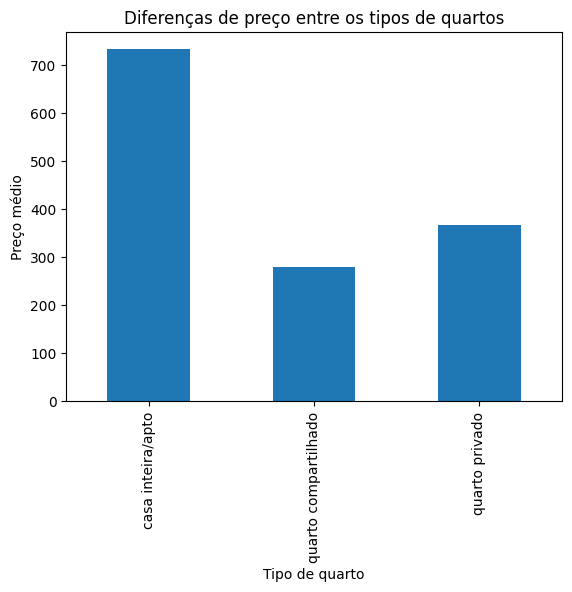

In [58]:
# Gráfico de barras das médias de preço por tipo de quarto
med_somareal_tipoquarto.plot(kind='bar')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço médio')
plt.title('Diferenças de preço entre os tipos de quartos')
plt.show()

In [59]:
# criar uma matriz de correlação
# mostrar a matriz de correlação
corr = df[['soma_real', 'tipo_quarto', 'capacidade_pessoas', 'class_limpeza', 'grau_satisfacao', 'dist', 'attr_index', 'rest_index', 'metro_dist']].corr()
corr

,soma_real,capacidade_pessoas,class_limpeza,grau_satisfacao,dist,attr_index,rest_index,metro_dist
soma_real,1.000000,0.526992,0.022938,0.136025,-0.258692,0.244193,0.208429,-0.142298
capacidade_pessoas,0.526992,1.000000,-0.065680,0.035399,-0.046410,0.044485,0.008940,-0.003328
class_limpeza,0.022938,-0.065680,1.000000,0.648809,-0.021712,-0.006147,0.010937,0.019532
grau_satisfacao,0.136025,0.035399,0.648809,1.000000,-0.059805,0.006316,-0.004934,0.050810
dist,-0.258692,-0.046410,-0.021712,-0.059805,1.000000,-0.705351,-0.751632,0.412042
attr_index,0.244193,0.044485,-0.006147,0.006316,-0.705351,1.000000,0.861256,-0.467947
rest_index,0.208429,0.008940,0.010937,-0.004934,-0.751632,0.861256,1.000000,-0.489143
metro_dist,-0.142298,-0.003328,0.019532,0.050810,0.412042,-0.467947,-0.489143,1.000000


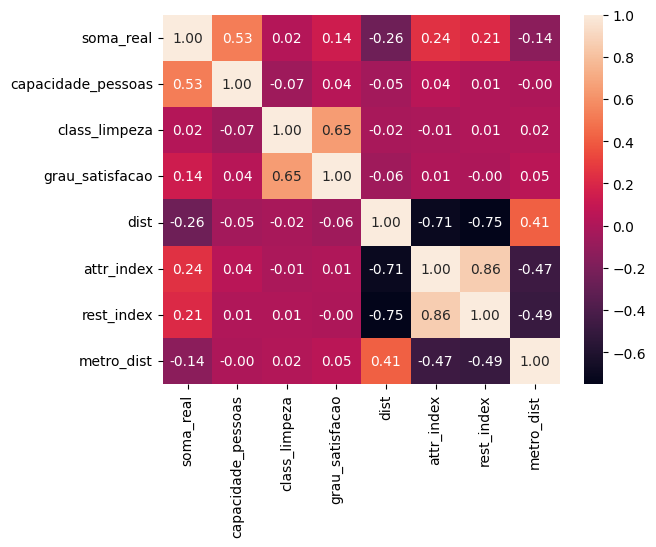

In [60]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, fmt='.2f', annot=True);


Com isso temos uma noção das correlações entre as variaveis, algumas dentro da nossa dedução fazem sentido.

Existe uma correlação forte entre class_limpeza com grau_satisfacao e capacidade_pessoas com soma_geral, o que faz sentido, pois são variaveis que estão explicando sobre os reviews recebidos.

Também podemos, que de modo geral, as variaveis tem poucas correlações entre si, tendo elas uma correlação muito fraca.

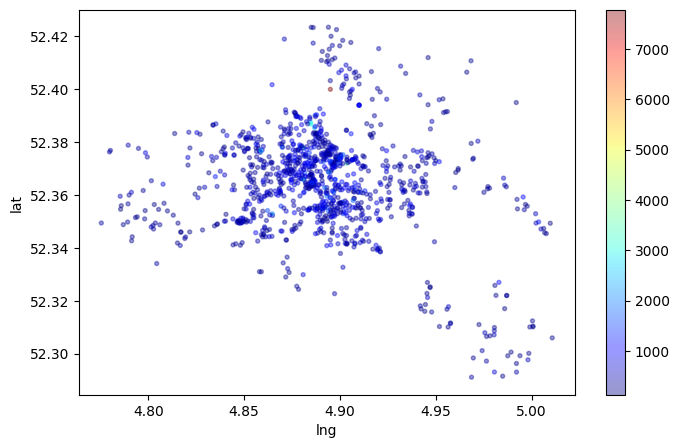

In [61]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='lng', y='lat', alpha=0.4, c=df['soma_real'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(8,5));

In [62]:
pivot_table = pd.pivot_table(data=df, values='soma_real', index='grau_satisfacao', columns='tipo_quarto')
print(pivot_table)

tipo_quarto      casa inteira/apto  quarto compartilhado  quarto privado
grau_satisfacao                                                         
20.0                           NaN                   NaN      233.637194
47.0                           NaN                   NaN      528.437185
60.0                    566.634640                   NaN      293.862630
65.0                    651.231458                   NaN             NaN
70.0                           NaN                   NaN      276.287114
73.0                           NaN                   NaN      657.324303
74.0                    371.194901                   NaN             NaN
75.0                    393.457221                   NaN      288.707145
76.0                    722.705223                   NaN             NaN
77.0                    347.995219                   NaN             NaN
78.0                           NaN                   NaN      464.540420
80.0                    643.310759                 

## Conclusões
Com tudo isso dito, concluímos que:

Quartos privados e apartamentos inteiros são os tipos de acomodações mais comuns, geralmente os mais caros possuem melhores avaliações;

Quartos privados e apartamentos inteiros geralmente são mais caros que quartos compartilhados;

A correlação entre "class_limpeza" e "grau_satisfacao" sugere que uma classificação mais alta de limpeza está associada a um maior grau de satisfação dos clientes. Isso indica que a limpeza desempenha um papel na percepção geral de satisfação dos clientes. Da mesma forma, a correlação entre "capacidade_pessoas" e "soma_real" sugere que uma maior capacidade de atender às necessidades das pessoas está relacionada a uma soma geral mais alta. Isso significa que quanto maior a capacidade de atendimento, meljor será a avaliação geral recebida.
Essas conclusões são coerentes com a ideia de que essas variáveis estão infkuenciando diretamente os reviews recebidos. Portanto, é importante considerar esses apectos ao analisar e melhorar a qualidade dos serviços prestados, visando aumentar a satisfação dos clientes e obter feedbacks mais positivos.